<font size="6"> **DMBEM Project**</font>


Lena Beber, Charles Gerike-Roberts, Elliot Regev

# Description of the Building

The building we tried to model is a two story house in England (Fig. 1). It is made out of concrete walls with a layer of insulation, has a suspended floor, a slanted roof with clay tiles and insulation and double glazed windows on every wall. 

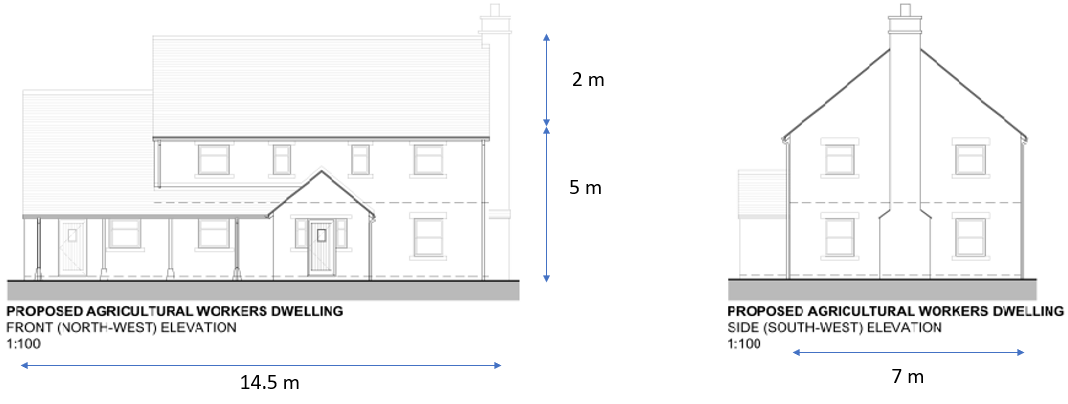

<center> Figure 1 </center>

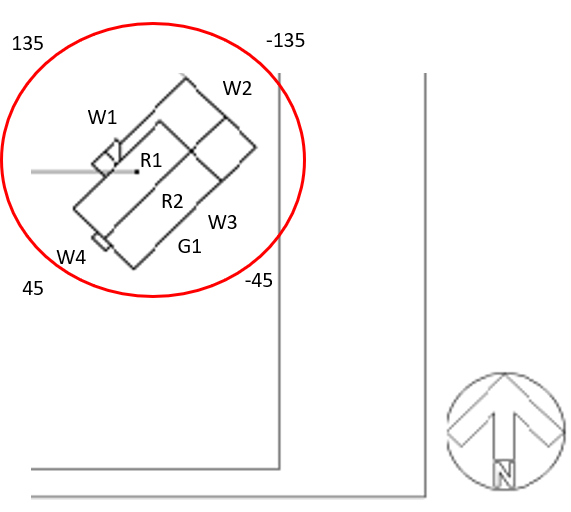

<center> Figure 2 </center>

# Hypothesis for Modelling

For our model we simplied the building described above with the assumptions and simplifications listed below:
- The walls separating the rooms and the floor inbetween the two stories can be neglected because of the equal temperature in every room.
- All the windows of the building are to be modelled as one large window which is on W3. The surface area of W3 has been reduced to take into account the size of the window.
- The auxiliary heat source inside the building has a total value of 100W.
- The temperature of the ground is taken as a constant temperature of 10°C.
- The building is surrounded by crops with an albedo of 0.2.
- The ground underneath the building is soil.
- All conducatances are indepedent of the temperature.
- The heat capacity for the soil is neglected.
- The view factors are integrated into the inside air convection by increasing the value of inside air convection by 20%.
- The radiation coming through the window onto the different interior surfaces is distributed evenly on each of these surfaces.


# Thermal Network Model

The thermal network model is shown below with a total of 10 thermal circuits.

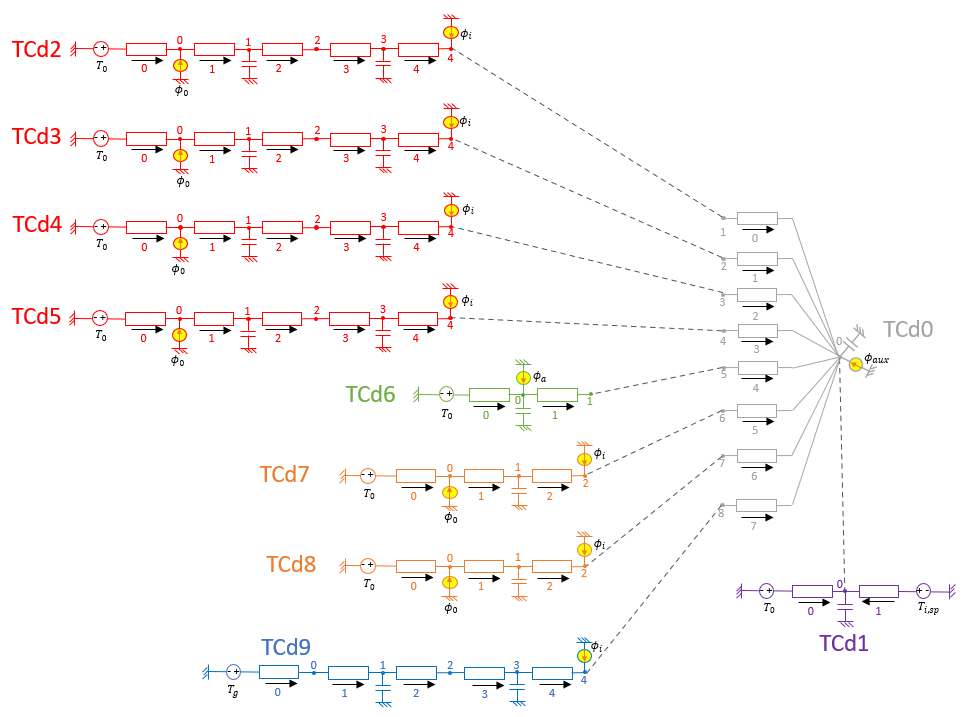

# Equations (Matrices and Vectors)

This section contains the matrices for each thermal element and the final assembly matrix for the solution.

## Thermal Circuit 0: Indoor Air

$ \color{grey}{ A_0= \left(\begin{array}{cc} 
1 & -1 & 0 & 0 & 0 & 0 & 0 & 0\\
1 & 0 & -1 & 0 & 0 & 0 & 0 & 0\\
1 & 0 & 0 & -1 & 0 & 0 & 0 & 0\\
1 & 0 & 0 & 0 & -1 & 0 & 0 & 0\\
1 & 0 & 0 & 0 & 0 & -1 & 0 & 0\\
1 & 0 & 0 & 0 & 0 & 0 & -1 & 0\\
1 & 0 & 0 & 0 & 0 & 0 & 0 & -1
\end{array}\right)
}$

$ \color{grey}{ G_0=\text{diag} \left(\begin{array}{cc} 
G_{in, wall_1} & G_{in, wall_2} & G_{in, wall_3} & G_{in, wall_4} & G_{in, glass} & G_{in, roof_{north}} & G_{in, roof_{south}} & G_{in, floor}
\end{array}\right)^T
}$

$ \color{grey}{ b_0= \left(\begin{array}{cc} 
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0
\end{array}\right)^T
}$

$ \color{grey}{ C_0=\text{diag} \left(\begin{array}{cc} 
C_{air}/2 & 0 & 0 & 0 & 0 & 0 & 0
\end{array}\right)^T
}$

$ \color{grey}{ f_0= \left(\begin{array}{cc} 
0 & 0 & 0 & 0 & 0 & 0 & 1
\end{array}\right)^T
}$

## Thermal Circuit 1: Ventilation

In order for the solver to be flexible for solving the various situations, three assembled thermal circuits are created, with a different Kp value in each circuit. This is denoted below $Kp_{f/c/h}$ which is the Kp value for free cooling ($Kp_{f}$), cooling ($Kp_{c}$) and heating ($Kp_{h}$).

$ \color{purple}{ A_1= \left(\begin{array}{cc} 
1\\
1
\end{array}\right)
}$

$ \color{purple}{ G_1=\text{diag} \left(\begin{array}{cc} 
G_{ventilation} & Kp_{f/c/h}
\end{array}\right)^T
}$

$ \color{purple}{ b_1= \left(\begin{array}{cc} 
1 & 1
\end{array}\right)^T
}$

$ \color{purple}{ C_1= C_{air}/2
}$

$ \color{purple}{ f_1= 1
}$

## Thermal Circuit 2, 3, 4 and 5: Solid Walls

$ \color{red}{ A_{2,3,4,5}= \left(\begin{array}{cc} 
1 & 0 & 0 & 0 & 0\\
-1 & 1 & 0 & 0 & 0\\
0 & -1 & 1 & 0 & 0\\
0 & 0 & -1 & 1 & 0\\
0 & 0 & 0 & -1 & 1
\end{array}\right)
}$

$ \color{red}{ G_{2,3,4,5}=\text{diag} \left(\begin{array}{cc} 
G_{out, wall} & 2G_c & 2G_c & 2G_i &2G_i
\end{array}\right)^T
}$

$ \color{red}{ b_{2,3,4,5}= \left(\begin{array}{cc} 
1 & 0 & 0 & 0 & 0
\end{array}\right)^T
}$

$ \color{red}{ C_{2,3,4,5}=\text{diag} \left(\begin{array}{cc} 
0 & C_c & 0 & C_i & 0
\end{array}\right)^T
}$

$ \color{red}{ f_{2,3,4,5}= \left(\begin{array}{cc} 
1 & 0 & 0 & 0 & 1
\end{array}\right)^T
}$

## Thermal Circuit 6: Windows (Glass)

$ \color{green}{ A_6= \left(\begin{array}{cc} 
1 & 0\\
-1 & 1
\end{array}\right)
}$

$ \color{green}{ G_6=\text{diag} \left(\begin{array}{cc} 
G_{out, glass} & 2G_g
\end{array}\right)^T
}$

$ \color{green}{ b_6= \left(\begin{array}{cc} 
1 & 0
\end{array}\right)^T
}$

$ \color{green}{ C_6=\text{diag} \left(\begin{array}{cc} 
C_g & 0
\end{array}\right)^T
}$

$ \color{green}{ f_6= \left(\begin{array}{cc} 
1 & 0
\end{array}\right)^T
}$

## Thermal Circuit 7 and 8: Roof

$ \color{orange}{ A_{7,8}= \left(\begin{array}{cc} 
-1 & 0 & 0\\
-1 & 1 & 0\\
0 & -1 & 1
\end{array}\right)
}$

$ \color{orange}{ G_{7,8}=\text{diag} \left(\begin{array}{cc} 
G_{out, roof_{north/south}} & 2G_i & 2G_i
\end{array}\right)^T
}$

$ \color{orange}{ b_{7,8}= \left(\begin{array}{cc} 
1 & 0 & 0
\end{array}\right)^T
}$

$ \color{orange}{ C_{7,8}=\text{diag} \left(\begin{array}{cc} 
0 & C_i & 0
\end{array}\right)^T
}$

$ \color{orange}{ f_{7,8}= \left(\begin{array}{cc} 
1 & 0 & 1
\end{array}\right)^T
}$

## Thermal Circuit 9: Floor

$ \color{blue}{ A_9= \left(\begin{array}{cc} 
1 & 0 & 0 & 0 & 0\\
-1 & 1 & 0 & 0 & 0\\
0 & -1 & 1 & 0 & 0\\
0 & 0 & -1 & 1 & 0\\
0 & 0 & 0 & -1 & 1
\end{array}\right)
}$

$ \color{blue}{ G_9=\text{diag} \left(\begin{array}{cc} 
G_{soil} & G_{in, floor} & G_{in, floor} & 2G_{wood} & 2G_{wood}
\end{array}\right)^T
}$

$ \color{blue}{ b_9= \left(\begin{array}{cc} 
1 & 0 & 0 & 0 & 0
\end{array}\right)^T
}$

$ \color{blue}{ C_9=\text{diag} \left(\begin{array}{cc} 
0 & C_{air} & 0 & C_{wood} & 0
\end{array}\right)^T
}$

$ \color{blue}{ f_9= \left(\begin{array}{cc} 
0 & 0 & 0 & 0 & 1
\end{array}\right)^T
}$

## Assembly Matrix

$ Ass= \left(\begin{array}{cc} 
\color{purple}{1} & \color{purple}{0} & \color{grey}{0} & \color{grey}{0}\\
\color{red}{2} & \color{red}{4} & \color{grey}{1} & \color{grey}{0}\\
\color{red}{3} & \color{red}{4} & \color{grey}{2} & \color{grey}{0}\\
\color{red}{4} & \color{red}{4} & \color{grey}{3} & \color{grey}{0}\\
\color{red}{5} & \color{red}{4} & \color{grey}{4} & \color{grey}{0}\\
\color{green}{6} & \color{green}{1} & \color{grey}{5} & \color{grey}{0}\\
\color{orange}{7} & \color{orange}{2} & \color{grey}{6} & \color{grey}{0}\\
\color{orange}{8} & \color{orange}{2} & \color{grey}{7} & \color{grey}{0}\\
\color{blue}{9} & \color{blue}{4} & \color{grey}{8} & \color{grey}{0}
\end{array}\right)
$


# Python Implementation

We decided to restructure the given code to make it more flexible. Our concept was two have one "main" python file that calls various functions for the different steps of the modelling. The structure of our code is depicted in the graphic below.

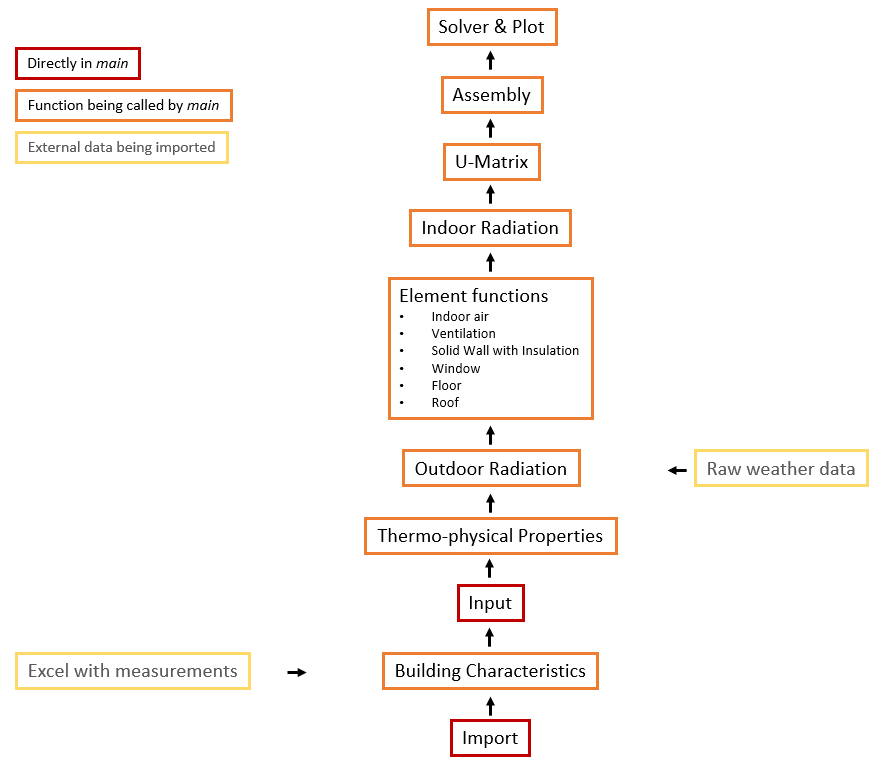

## Import

In the beginning of the main file, all the necessary modules and function-files are being imported. The Stefan-Bolzmann-Constant is defined as a global variable.
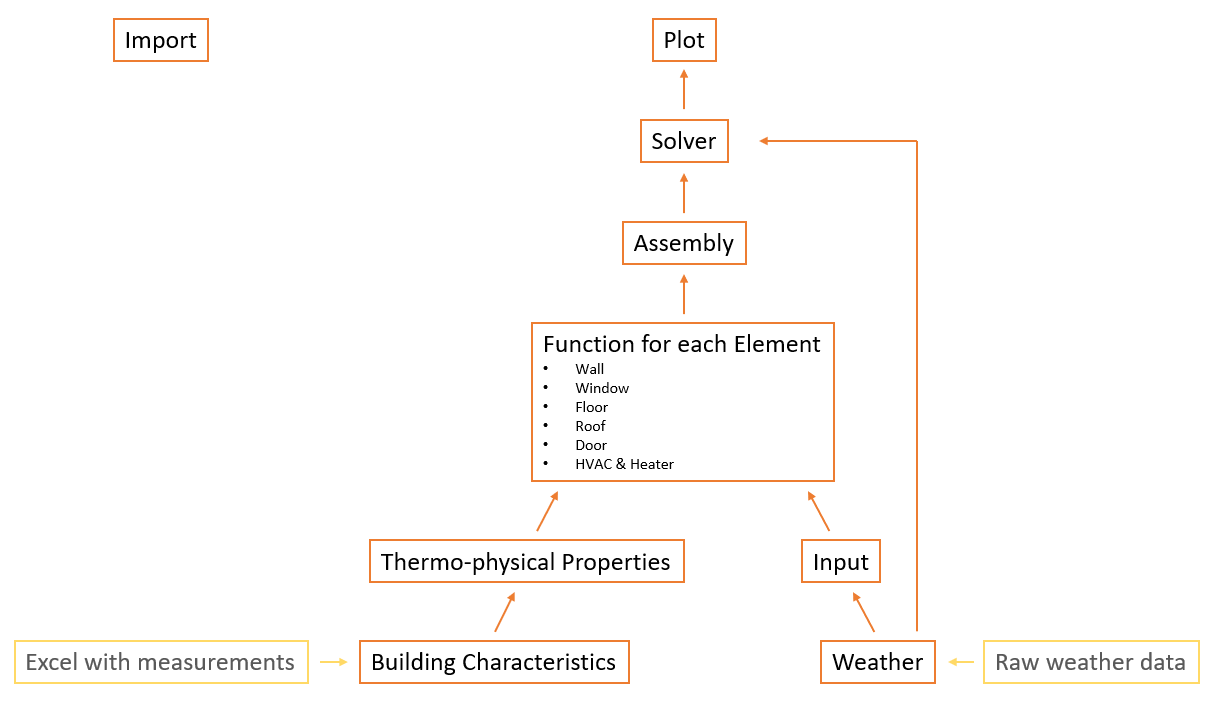

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import TCM_funcs
import dm4bem
import copy

# global constants
σ = 5.67e-8     # W/m².K⁴ Stefan-Bolzmann constant

## Building Characteristics

This function is designed to read a csv file which contains the characteristics of the building and creates a data frame from it.

In [2]:
def building_characteristics():
    """
    This code is designed to read an excel file which contains the characteristics of the building
    and create a data frame from it.
    """

    bc = pd.read_csv(r'Building Characteristics_real.csv', na_values=["N"], keep_default_na=True)

    return bc

This function is the first to be called in the main file. The resulting data frame is the base for the rest of the code and the structure of the thermal circuits. 

In [3]:
# Define building characteristics
bc = TCM_funcs.building_characteristics()

print(bc)

  Element_Code     Element_Type Material_1  Material_2 Material_3  Length  \
0           W1  Solid Wall w/In   Concrete  Insulation        NaN     NaN   
1           W2  Solid Wall w/In   Concrete  Insulation        NaN     7.0   
2           W3  Solid Wall w/In   Concrete  Insulation        NaN     NaN   
3           W4  Solid Wall w/In   Concrete  Insulation        NaN     7.0   
4           G1               DG      Glass         NaN        NaN     2.5   
5           R1   Flat Roof w/In       Tile  Insulation        NaN    14.5   
6           R2   Flat Roof w/In       Tile  Insulation        NaN    14.5   
7           F1  Suspended Floor       Wood         Air       Soil     7.0   

   Width  Height  Thickness_1  Thickness_2  Thickness_3     Surface  Volume  \
0   14.5     5.0          0.1          0.1          NaN   72.500000   511.0   
1    NaN     5.0          0.1          0.1          NaN   35.000000     NaN   
2   14.5     5.0          0.1          0.1          NaN   66.250000  

As one can see, this data frame consists of different elements that can each be modelled as one thermal circuit. For every element the materials that are part of this element are specified as well as dimensions for the whole element and for the single materials.

Properties specified for each element:
- Element Code
- Element Type
- Material 1, 2 and 3
- Length
- Width
- Height
- Thickness of each Material
- Surface Area
- Volume
- Slope
- Azimuth
- Mesh for each Material



## Input 

After this, changeable input variables are defined in the main file:

In [4]:
# Define Inputs
Kpc = 300                                                                     # cooling Kp value
Kpf = 1e-3                                                                    # free cooling Kp value
Kph = 1e4                                                                     # heating Kp value
dt = 40                                                                       # s - time step for solver
T_set = pd.DataFrame([{'cooling': 26, 'heating': 20}])                        # C - temperature set points
Tm = 20 + 273.15                                                              # K - Mean temperature for radiative exchange
ACH = 1                                                                       # h*-1 - no. of air changes in volume per hour
h = pd.DataFrame([{'in': 4., 'out': 10}])                                     # W/m² K - convection coefficients
V = bc.Volume[0]                                                              # m³
Vdot = V * ACH / 3600                                                         # m³/s - volume flow rate due to air changes
albedo_sur = 0.2                                                              # albedo for the surroundings
latitude = 51                                                                 # latitude of building
Qa = 100                                                                      # auxiliary heat flow
Tisp = 20                                                                     # desired indoor temperature
DeltaT = 5                                                                    # maximum temperature difference for cooling
DeltaBlind = 2                                                                # maximum temperature difference for blinds controller
WF = 'GBR_ENG_RAF.Lyneham.037400_TMYx.2004-2018.epw'                          # name of weather file
t_start = '2000-01-03 12:00:00'                                               # start date and time
t_end = '2000-01-04 18:00:00'                                                 # end date and time
Tg = 10                                                                       # ground temperature

## Thermo-physical Properties

In this function, a data frame containing thermo-physical properties for various materials is created. As an input variable the bc data frame is given into the function and is being extended by the thermo-physical properties according to the specified materials per element. This extended version of the bc data frame (now called bcp, "Building Characteristics with thermo physical Properties") is being returned to the main. 

Materials currently present in the thermal properties data frame:
- concrete
- insulation
- glass
- air
- tiles
- wood

Properties listed for each of materials above:
- density kg/m³
- specific heat J/kg.K
- conductivity W/m.K
- long wave emissivity
- short wave transmittance
- absorptivity
- albedo

The values for these properties were taken from Incropera et al. (2011) Fundamentals of heat and mass transfer, 7 ed, Table A3, and the Engineering Toolbox (https://www.engineeringtoolbox.com, 30. October 2021).


In [5]:
def thphprop(BCdf):
    """
    Parameters
    ----------
    BCdf : data frame of building characteristics
        DESCRIPTION.
        Data Frame of building characteristics. Example:
                BCdf = ['Element Code', 'Element Type', 'Material 1', 'Material 2', 'Material 3', 'Length', 'Width',
                'Height', 'Thickness 1', 'Thickness 2', Thickness 3', 'Surface', 'Volume', 'Slope', 'Azimuth', ]

    Returns
    -------
    Bdf : data frame
        DESCRIPTION.
        data frame of the Building characteristics with associated thermophysical properties
                Bdf = ['Element Code', 'Element Type', 'Material 1', 'Material 2', 'Material 3', 'Length', 'Width',
                'Height', 'Thickness 1', 'Thickness 2', Thickness 3', 'Surface', 'Volume', 'Slope', 'Azimuth',
                'Density 1', 'specific heat 1', 'conductivity 1', 'LW emissivity 1', 'SW transmittance 1',
                'SW absorptivity 1', 'albedo 1', 'Density 2', 'specific heat 2', 'conductivity 2', 'LW emissivity 2',
                'SW transmittance 2', 'SW absorptivity 2', 'albedo 2', 'Density 3', 'specific heat 3', 'conductivity 3',
                'LW emissivity 3', 'SW transmittance 3', 'SW absorptivity 3', 'albedo 3']
    """

    # Thermo-physical and radiative properties - source data frame
    # ----------------------------------------------------------

    """ Incropera et al. (2011) Fundamentals of heat and mass transfer, 7 ed,
        Table A3,
            concrete (stone mix) p. 993
            insulation polystyrene extruded (R-12) p.990
            glass plate p.993
            Clay tile, hollow p.989
            Wood, oak p.989
            Soil p.994

        EngToolbox Emissivity Coefficient Materials, Glass, pyrex
        EngToolbox Emissivity Coefficient Materials, Clay
        EngToolbox Emissivity Coefficient Materials, Wood Oak, planned
        EngToolbox Absorbed Solar Radiation by Surface Color, white smooth surface
        EngToolbox Optical properties of some typical glazing mat Window glass
        EngToolbox Absorbed Solar Radiation by Material, Tile, clay red
        EngToolbox Absorbed Solar Radiation by Surface Color, Green, red and brown
        """
    thphp = {'Material': ['Concrete', 'Insulation', 'Glass', 'Air', 'Tile', 'Wood', 'soil'],
             'Density': [2300, 55, 2500, 1.2, None, 720, 2050],  # kg/m³
             'Specific_Heat': [880, 1210, 750, 1000, None, 1255, 1840],  # J/kg.K
             'Conductivity': [1.4, 0.027, 1.4, None, 0.52, 0.16, 0.52],  # W/m.K
             'LW_Emissivity': [0.9, 0, 0.9, 0, 0.91, 0.885, None],
             'SW_Transmittance': [0, 0, 0.83, 1, 0, 0, 0],
             'SW_Absorptivity': [0.25, 0.25, 0.1, 0, 0.64, 0.6, None],
             'Albedo': [0.75, 0.75, 0.07, 0, 0.36, 0.4, None]}  # albedo + SW transmission + SW absorptivity = 1

    thphp = pd.DataFrame(thphp)

    # add empty columns for thermo-physical properties
    BCdf = BCdf.reindex(columns=BCdf.columns.to_list() + ['rad_s', 'density_1', 'specific_heat_1', 'conductivity_1',
                                                          'LW_emissivity_1', 'SW_transmittance_1', 'SW_absorptivity_1',
                                                          'albedo_1', 'density_2', 'specific_heat_2', 'conductivity_2',
                                                          'LW_emissivity_2', 'SW_transmittance_2', 'SW_absorptivity_2',
                                                          'albedo_2', 'density_3', 'specific_heat_3', 'conductivity_3',
                                                          'LW_emissivity_3', 'SW_transmittance_3', 'SW_absorptivity_3',
                                                          'albedo_3'])

    # fill columns with properties for the given materials 1-3 of each element
    for i in range(0, len(BCdf)):
        for j in range(0, len(thphp['Material'])):
            if BCdf.loc[i, 'Material_1'] == thphp.Material[j]:
                BCdf.loc[i, 'density_1'] = thphp.Density[j]
                BCdf.loc[i, 'specific_heat_1'] = thphp.Specific_Heat[j]
                BCdf.loc[i, 'conductivity_1'] = thphp.Conductivity[j]
                BCdf.loc[i, 'LW_emissivity_1'] = thphp.LW_Emissivity[j]
                BCdf.loc[i, 'SW_transmittance_1'] = thphp.SW_Transmittance[j]
                BCdf.loc[i, 'SW_absorptivity_1'] = thphp.SW_Absorptivity[j]
                BCdf.loc[i, 'albedo_1'] = thphp.Albedo[j]

        for j in range(0, len(thphp['Material'])):
            if BCdf.loc[i, 'Material_2'] == thphp.Material[j]:
                BCdf.loc[i, 'density_2'] = thphp.Density[j]
                BCdf.loc[i, 'specific_heat_2'] = thphp.Specific_Heat[j]
                BCdf.loc[i, 'conductivity_2'] = thphp.Conductivity[j]
                BCdf.loc[i, 'LW_emissivity_2'] = thphp.LW_Emissivity[j]
                BCdf.loc[i, 'SW_transmittance_2'] = thphp.SW_Transmittance[j]
                BCdf.loc[i, 'SW_absorptivity_2'] = thphp.SW_Absorptivity[j]
                BCdf.loc[i, 'albedo_2'] = thphp.Albedo[j]

        for j in range(0, len(thphp['Material'])):
            if BCdf.loc[i, 'Material_3'] == thphp.Material[j]:
                BCdf.loc[i, 'density_3'] = thphp.Density[j]
                BCdf.loc[i, 'specific_heat_3'] = thphp.Specific_Heat[j]
                BCdf.loc[i, 'conductivity_3'] = thphp.Conductivity[j]
                BCdf.loc[i, 'LW_emissivity_3'] = thphp.LW_Emissivity[j]
                BCdf.loc[i, 'SW_transmittance_3'] = thphp.SW_Transmittance[j]
                BCdf.loc[i, 'SW_absorptivity_3'] = thphp.SW_Absorptivity[j]
                BCdf.loc[i, 'albedo_3'] = thphp.Albedo[j]

    return BCdf

This function is second to be called in the main:

In [6]:
# Add thermo-physical properties
bcp = TCM_funcs.thphprop(bc)

## Outdoor Radiation

Next we calculate the radiation hitting the building from outside, taking into account the azimuth for each element using the following function:

In [7]:
def rad(bcp, albedo_sur, latitude, dt, WF, t_start, t_end):
    # Simulation with weather data
    # ----------------------------
    filename = WF
    start_date = t_start
    end_date = t_end

    # Read weather data from Energyplus .epw file
    [data, meta] = dm4bem.read_epw(filename, coerce_year=None)
    weather = data[["temp_air", "dir_n_rad", "dif_h_rad"]]
    del data
    weather.index = weather.index.map(lambda t: t.replace(year=2000))
    weather = weather[(weather.index >= start_date) & (
            weather.index < end_date)]
    # Solar radiation on a tilted surface South
    Φt = {}
    for k in range(0, len(bcp)):
        surface_orientationS = {'slope': bcp.loc[k, 'Slope'],
                                'azimuth': bcp.loc[k, 'Azimuth'],
                                'latitude': latitude}
        rad_surf = dm4bem.sol_rad_tilt_surf(weather, surface_orientationS, albedo_sur)
        Φt.update({str(k + 2): rad_surf.sum(axis=1)})

    Φt = pd.DataFrame(Φt)
    # Interpolate weather data for time step dt
    data = pd.concat([weather['temp_air'], Φt], axis=1)
    data = data.resample(str(dt) + 'S').interpolate(method='linear')
    data = data.rename(columns={'temp_air': 'To'})

    # time
    t = dt * np.arange(data.shape[0])

    return data, t

This is called in the main:

In [8]:
# Determine solar radiation for each element
rad_surf_tot, t = TCM_funcs.rad(bcp, albedo_sur, latitude, dt, WF, t_start, t_end)

## Element Functions

For the next step, the matrices for every single element are being created and stored in a data frame. As of now there are functions for six different elements:

- Indoor Air
- Ventilation (HVAC)
- Solid Wall with Insulation
- Window (single glazing)
- Floor
- Roof (one plain)

Depending on the element there are diffierent variables that need to be defined to create the matrices, so the input for every element function is different, as can be seen in the beginning of each function.

Two additional arrays, $Q$ and $T$, have been added for each element which are used to calculate and store the actual values for the heat and temperature sources respectively. The indoor radiation value of the $Q$ array is set to -1, to indicate that an indoor radiation exists, but it can not yet be calculated. This is because the code will have not run through all of the bcp to identify all of the elements and as there can be more than one window, the for loop in the main must be completed before the indoor radiation can be calculated. Both $Q$ and $T$ are used later in the code to automate the definition of the input matrix, $u$.

In [9]:
def indoor_air(bcp_sur, h, V, Qa, rad_surf_tot):
    """
    Input:
    bcp_sur, surface column of bcp dataframe
    h, convection dataframe
    V, Volume of the room (from bcp)
    Output: TCd, a dictionary of the all the matrices of the thermal circuit of the inside air
    """
    nt = len(bcp_sur) + 1
    nq = len(bcp_sur)

    nq_ones = np.ones(nq)
    A = np.diag(-nq_ones)
    A = np.c_[nq_ones, A]

    G = np.zeros(nq)
    for i in range(0, len(G)):
        G[i] = h['in'] * bcp_sur[i]*1.2
    G = np.diag(G)
    b = np.zeros(nq)
    C = np.zeros(nt)
    C[0] = (1.2 * 1000 * V) / 2  # Capacity air = Density*specific heat*V
    C = np.diag(C)
    f = np.zeros(nt)
    f[0] = 1
    y = np.zeros(nt)
    y[0] = 1
    Q = np.zeros((rad_surf_tot.shape[0], nt))
    Q[:, 0] = Qa
    Q[:, 1:nt] = 'NaN'
    T = np.zeros((rad_surf_tot.shape[0], nq))
    T[:, 0:nq] = 'NaN'

    TCd = {'A': A, 'G': G, 'b': b, 'C': C, 'f': f, 'y': y, 'Q': Q, 'T': T}

    return TCd


def ventilation(V, V_dot, Kpf, T_set, rad_surf_tot):
    """
    Input:
    V, Volume of the room (from bcp)
    V_dot
    Kp
    Output:
    TCd, a dictionary of the all the matrices describing the thermal circuit of the ventilation
    """
    Gv = V_dot * 1.2 * 1000  # Va_dot * air['Density'] * air['Specific heat']
    A = np.array([[1],
                  [1]])
    G = np.diag(np.hstack([Gv, Kpf]))
    b = np.array([1, 1])
    C = np.array([(1.2 * 1000 * V) / 2])
    f = 0
    y = 1
    Q = np.zeros((rad_surf_tot.shape[0], 1))
    Q[:, 0] = 'NaN'
    T = np.zeros((rad_surf_tot.shape[0], 2))
    T[:, 0] = rad_surf_tot['To']
    T[:, 1] = T_set['heating']

    vent_c = {'A': A, 'G': G, 'b': b, 'C': C, 'f': f, 'y': y, 'Q': Q, 'T': T}

    return vent_c


def solid_wall_w_ins(bcp_r, h, rad_surf_tot, uc):
    """
    Input:
    bcp_r, one row of the bcp dataframe
    h, convection dataframe
    Output: TCd, a dictionary of the all the matrices of one thermal circuit describing a solid wall with insulation
    """
    # Thermal conductances
    # Conduction
    G_cd_cm = bcp_r['conductivity_1'] / bcp_r['Thickness_1'] * bcp_r['Surface']  # concrete
    G_cd_in = bcp_r['conductivity_2'] / bcp_r['Thickness_2'] * bcp_r['Surface']  # insulation

    # Convection
    Gw = h * bcp_r['Surface']  # wall

    # Thermal capacities
    Capacity_cm = bcp_r['density_1'] * bcp_r['specific_heat_1'] * bcp_r['Surface'] * bcp_r['Thickness_1']
    Capacity_in = bcp_r['density_2'] * bcp_r['specific_heat_2'] * bcp_r['Surface'] * bcp_r['Thickness_2']

    # Thermal network
    # ---------------
    nq = 1 + 2 * (int(bcp_r['Mesh_1']) + int(bcp_r['Mesh_2']))
    nt = 1 + 2 * (int(bcp_r['Mesh_1']) + int(bcp_r['Mesh_2']))

    A = np.eye(nq + 1, nt)
    A = -np.diff(A, 1, 0).T

    nc = int(bcp_r['Mesh_1'])
    ni = int(bcp_r['Mesh_2'])
    Gcm = 2 * nc * [G_cd_cm]
    Gcm = 2 * nc * np.array(Gcm)
    Gim = 2 * ni * [G_cd_in]
    Gim = 2 * ni * np.array(Gim)
    G = np.diag(np.hstack([Gw['out'], Gcm, Gim]))

    b = np.zeros(nq)
    b[0] = 1

    Ccm = Capacity_cm / nc * np.mod(range(0, 2 * nc), 2)
    Cim = Capacity_in / ni * np.mod(range(0, 2 * ni), 2)
    C = np.diag(np.hstack([Ccm, Cim, 0]))

    f = np.zeros(nt)
    f[0] = f[-1] = 1

    y = np.zeros(nt)

    Q = np.zeros((rad_surf_tot.shape[0], nt))
    Q[:, 0] = bcp_r['SW_absorptivity_1'] * bcp_r['Surface'] * rad_surf_tot[str(uc)]
    Q[:, (nt - 1)] = -1
    uca = uc + 1
    Q[:, 1:(nt - 1)] = 'NaN'

    T = np.zeros((rad_surf_tot.shape[0], nq))
    T[:, 0] = rad_surf_tot['To']
    T[:, 1:nq] = 'NaN'

    TCd = {'A': A, 'G': G, 'b': b, 'C': C, 'f': f, 'y': y, 'Q': Q, 'T': T}

    return TCd, uca


def window(bcp_r, h, rad_surf_tot, uc):
    """
    Input:
    bcp_r, one row of the bcp dataframe
    h, convection dataframe
    Output: TCd, a dictionary of the all the matrices of one thermal circuit describing a solid wall with insulation
    """
    nq = 2 * (int(bcp_r['Mesh_1']))
    nt = 2 * (int(bcp_r['Mesh_1']))

    A = np.array([[1, 0],
                  [-1, 1]])
    Ggo = h['out'] * bcp_r['Surface']
    Ggs = 1 / (1 / Ggo + 1 / (2 * bcp_r['conductivity_1']))
    G = np.diag(np.hstack([Ggs, 2 * bcp_r['conductivity_1']]))
    b = np.array([1, 0])
    C = np.diag([bcp_r['density_1'] * bcp_r['specific_heat_1'] * bcp_r['Surface'] * bcp_r['Thickness_1'], 0])
    f = np.array([1, 0])
    y = np.array([0, 0])

    Q = np.zeros((rad_surf_tot.shape[0], nt))
    IG_surface = bcp_r['Surface'] * rad_surf_tot[str(uc)]
    IGR = np.array(bcp_r['SW_transmittance_1'] * bcp_r['Surface'] * rad_surf_tot[str(uc)])
    Q[:, 0] = bcp_r['SW_absorptivity_1'] * IG_surface
    uca = uc + 1
    Q[:, 1:nt] = 'NaN'

    T = np.zeros((rad_surf_tot.shape[0], nq))
    T[:, 0] = rad_surf_tot['To']
    T[:, 1:nq] = 'NaN'

    TCd = {'A': A, 'G': G, 'b': b, 'C': C, 'f': f, 'y': y, 'Q': Q, 'T': T}

    return TCd, uca, IGR


def susp_floor(bcp_r, h, V, rad_surf_tot, uc, Tg):
    """
    Input:
    bcp_r, one row of the bcp dataframe
    h, convection dataframe
    V, Volume of the room from bcp
    Output: TCd, a dictionary of the all the matrices of one thermal circuit describing a suspended floor
    """
    nq = 1 + 2 * (int(bcp_r['Mesh_2']) + int(bcp_r['Mesh_3']))
    nt = 1 + 2 * (int(bcp_r['Mesh_2']) + int(bcp_r['Mesh_3']))

    A = np.array([[1, 0, 0, 0, 0],
                  [-1, 1, 0, 0, 0],
                  [0, -1, 1, 0, 0],
                  [0, 0, -1, 1, 0],
                  [0, 0, 0, -1, 1]])
    Gw = h * bcp_r['Surface']
    G_cd = bcp_r['conductivity_3'] / bcp_r['Thickness_3'] * bcp_r['Surface']  # wood
    G_cd_soil = bcp_r['conductivity_1'] / bcp_r['Thickness_1'] * bcp_r['Surface']
    G = np.diag(np.hstack(
        [G_cd_soil, Gw['in'], Gw['in'], G_cd, G_cd]))
    b = np.array([1, 0, 0, 0, 0])
    Capacity_w = bcp_r['density_3'] * bcp_r['specific_heat_3'] * bcp_r['Surface'] * bcp_r['Thickness_3']  # wood
    Capacity_a = bcp_r['density_2'] * bcp_r['specific_heat_2'] * V  # air
    C = np.diag([0, Capacity_a, 0, Capacity_w, 0])
    f = np.array([0, 0, 0, 0, 1])
    y = np.array([0, 0, 0, 0, 0])

    Q = np.zeros((rad_surf_tot.shape[0], nt))
    Q[:, 0] = bcp_r['SW_absorptivity_3'] * bcp_r['Surface'] * rad_surf_tot[str(uc)]
    Q[:, (nt - 1)] = -1
    uca = uc + 1
    Q[:, 0:(nt - 1)] = 'NaN'

    T = np.zeros((rad_surf_tot.shape[0], nq))
    T[:, 0] = Tg
    T[:, 1:nq] = 'NaN'

    TCd = {'A': A, 'G': G, 'b': b, 'C': C, 'f': f, 'y': y, 'Q': Q, 'T': T}

    return TCd, uca


def flat_roof_w_in(bcp_r, h, rad_surf_tot, uc):
    """
    Input:
    bcp_r, one row of the bcp dataframe
    h, convection dataframe
    Output: TCd, a dictionary of the all the matrices of one thermal circuit describing a flat roof with insulation
    """
    nq = 1 + 2 * (int(bcp_r['Mesh_1']))
    nt = 1 + 2 * (int(bcp_r['Mesh_1']))

    A = np.array([[-1, 0, 0],
                  [-1, 1, 0],
                  [0, -1, 1]])
    Gw = h * bcp_r['Surface']
    G_cd_in = bcp_r['conductivity_2'] / bcp_r['Thickness_2'] * bcp_r['Surface']  # insulation
    ni = int(bcp_r['Mesh_2'])
    Gim = 2 * ni * [G_cd_in]
    Gim = 2 * ni * np.array(Gim)
    G = np.diag(np.hstack([Gw['out'], Gim]))
    b = np.array([1, 0, 0])
    Capacity_i = bcp_r['density_2'] * bcp_r['specific_heat_2'] * bcp_r['Surface'] * bcp_r['Thickness_2']  # insulation
    C = np.diag([0, Capacity_i, 0])
    f = np.array([1, 0, 1])
    y = np.array([0, 0, 0])

    Q = np.zeros((rad_surf_tot.shape[0], nt))
    Q[:, 0] = bcp_r['SW_absorptivity_1'] * bcp_r['Surface'] * rad_surf_tot[str(uc)]
    Q[:, (nt - 1)] = -1
    uca = uc + 1
    Q[:, 1:(nt - 1)] = 'NaN'

    T = np.zeros((rad_surf_tot.shape[0], nq))
    T[:, 0] = rad_surf_tot['To']
    T[:, 1:nq] = 'NaN'

    TCd = {'A': A, 'G': G, 'b': b, 'C': C, 'f': f, 'y': y, 'Q': Q, 'T': T}

    return TCd, uca

The element functions all return two variables, one is a dictionary with all the matrices of the thermal sub-circuit and the other is an integer uca, which counts the number of heat flows that have been used. This variable is important for the creation of the $u$ matrix later on.

The dictionaries returned by these functions are stored in yet another dictionary for all thermal circuits, later to be turned into a data frame. After creating an empty dictionary in the main, it is filled with the dict.update function. As the thermal circuits of the indoor air and the ventilation are present in every model we decided they should always be thermal circuit 0 and 1 in the overall TCd data frame. This is why they are called first in the main. The remaining element functions are called via a for-loop going through the rows of the bcp data frame. With the help of if-statements it is determined, which element function is to be called. The benefit of this method is that additional elements can added to the excel file and the code will be able to include them in the assembled dataframe without the need for changing variables in the code. This also means it does not matter in which order the elements are called, as they will all be assembled in the same way.

In [10]:
# Thermal Circuits
TCd = {}
TCd.update({str(0): TCM_funcs.indoor_air(bcp.Surface, h, V, Qa, rad_surf_tot)}) # inside air
TCd.update({str(1): TCM_funcs.ventilation(V, Vdot, Kpf, T_set, rad_surf_tot)})  # ventilation and heating
uc = 2                                                                          # variable to track how many heat flows have been used
IG = np.zeros([rad_surf_tot.shape[0], 1])                                       # set the radiation entering through windows to zero
for i in range(0, len(bcp)):
    if bcp.Element_Type[i] == 'Solid Wall w/In':
        TCd_i, uca = TCM_funcs.solid_wall_w_ins(bcp.loc[i, :], h, rad_surf_tot, uc)
        TCd.update({str(i+2): TCd_i})
    elif bcp.Element_Type[i] == 'DG':
        TCd_i, uca, IGR = TCM_funcs.window(bcp.loc[i, :], h, rad_surf_tot, uc)
        TCd.update({str(i+2): TCd_i})
        IG = IGR / 7                                                            # update total radiation coming through windows
    elif bcp.Element_Type[i] == 'Suspended Floor':
        TCd_i, uca = TCM_funcs.susp_floor(bcp.loc[i, :], h, V, rad_surf_tot, uc, Tg)
        TCd.update({str(i+2): TCd_i})
    elif bcp.Element_Type[i] == 'Flat Roof w/In':
        TCd_i, uca = TCM_funcs.flat_roof_w_in(bcp.loc[i, :], h, rad_surf_tot, uc)
        TCd.update({str(i+2): TCd_i})
    uc = uca                                                                    # update heat flow tracker
    

TCd_f = copy.deepcopy(TCd)

## Indoor Radiation
In a seperate for-loop-if-elif-constellation for the elements where we have to consider the indoor radiation, the indoor_rad functions is called.

After this, three copies of the overall thermal circuit dictionary are being created, one for the scenario of free cooling ($TCd_{f}$), one for the scenario of active cooling ($TCd_{c}$), and one for the scenario of heating ($TCd_{h}$). The only matrix varying due to the $Kp$ value is the ventilation sub-circuit. As the overall $TCd$ has been created using the $Kp$ for free cooling ($Kp_{f}$), the dictionary entry corresponding to the ventilation has to be recalculated for $TCd_{c}$ and $TCd_{h}$ by calling the ventilation function again, this time with $Kp_{c}$ and $Kp_{h}$ respectively.

In terms of indoor radiation, $TCd_{h}$ is an exact replica of $TCd_{f}$, but for $TCd_{c}$ we designed the function indoor_rad_c. The purpose of $TCd_{c}$ is to model the closing of the blinds to reduce the indoor radiation to zero to cool the building. This is simply done by setting the values of $Q$ to zero.

The three dictionaries are turned into pandas data frames for further use.

In [11]:
def indoor_rad(bcp_r, TCd, IG):
    Q = TCd['Q']
    lim = np.shape(Q)[1]
    for i in range(0, lim):
        if Q[0, i] == -1:
            if np.isnan(bcp_r['SW_absorptivity_3']):
                if np.isnan(bcp_r['SW_absorptivity_2']):
                    Q[:, i] = bcp_r['SW_absorptivity_1'] * IG
                else:
                    Q[:, i] = bcp_r['SW_absorptivity_2'] * IG
            else:
                Q[:, i] = bcp_r['SW_absorptivity_3'] * IG

    TCd['Q'] = Q  # replace Q in TCd with new Q

    return TCd

def indoor_rad_c(TCd_c):
    Q = TCd_c['Q']
    lim = np.shape(Q)[1]
    for i in range(0, lim):
        if Q[0, i] == -1:
            Q[:, i] = 0
            
    TCd_c['Q'] = Q  # replace Q in TCd with new Q

    return TCd_c

In [12]:
for i in range(0, len(bcp)):
    if bcp.Element_Type[i] == 'Solid Wall w/In':
        TCd_i = TCM_funcs.indoor_rad(bcp.loc[i, :], TCd_f[str(i+2)], IG)
        TCd_f[str(i+2)] = TCd_i
    elif bcp.Element_Type[i] == 'Suspended Floor':
        TCd_i = TCM_funcs.indoor_rad(bcp.loc[i, :], TCd_f[str(i+2)], IG)
        TCd_f[str(i + 2)] = TCd_i
    elif bcp.Element_Type[i] == 'Flat Roof w/In':
        TCd_i = TCM_funcs.indoor_rad(bcp.loc[i, :], TCd_f[str(i+2)], IG)
        TCd_f[str(i + 2)] = TCd_i

TCd_h = copy.deepcopy(TCd_f)
TCd_c = copy.deepcopy(TCd)

for i in range(0, len(bcp)):
    if bcp.Element_Type[i] == 'Solid Wall w/In':
        TCd_i = TCM_funcs.indoor_rad_c(TCd_c[str(i+2)])
        TCd_c[str(i+2)] = TCd_i
    elif bcp.Element_Type[i] == 'Suspended Floor':
        TCd_i = TCM_funcs.indoor_rad_c(TCd_c[str(i+2)])
        TCd_c[str(i + 2)] = TCd_i
    elif bcp.Element_Type[i] == 'Flat Roof w/In':
        TCd_i = TCM_funcs.indoor_rad_c(TCd_c[str(i+2)])
        TCd_c[str(i + 2)] = TCd_i
        
TCd_c[str(1)] = TCM_funcs.ventilation(V, Vdot, Kpc, T_set, rad_surf_tot)
TCd_h[str(1)] = TCM_funcs.ventilation(V, Vdot, Kph, T_set, rad_surf_tot)

TCd_f = pd.DataFrame(TCd_f)
TCd_c = pd.DataFrame(TCd_c)
TCd_h = pd.DataFrame(TCd_h)

## U-Matrix

With all this information, we can now create the u-matrix. There are two functions used to assemble the $u$ matrix, the first being valid for the scenarios free cooling and heating and the second for active cooling. The functions give outputs of $u$ and $u_c$ respectively. 

In [13]:
def u_assembly(TCd, rad_surf_tot):
    rad_surf_tot = rad_surf_tot.loc[:, rad_surf_tot.any()]
    u = np.empty((len(rad_surf_tot), 1))  # create u matrix
    for i in range(0, TCd.shape[1]):
        TCd_i = TCd[str(i)]
        T = TCd_i['T']
        T = T[:, ~np.isnan(T).any(axis=0)]
        if np.shape(T)[1] == 0:
            print('No Temp')
        else:
            u = np.append(u, T, axis=1)

    u = np.delete(u, 0, 1)

    for j in range(0, TCd.shape[1]):
        TCd_j = TCd[str(j)]
        Q = TCd_j['Q']
        Q = Q[:, ~np.isnan(Q).any(axis=0)]
        if np.shape(Q)[1] == 0:
            print('No Heat Flow')
        else:
            u = np.append(u, Q, axis=1)

    u = pd.DataFrame(u)

    return u, rad_surf_tot

def u_assembly_c(TCd_c, rad_surf_tot):
    rad_surf_tot = rad_surf_tot.loc[:, rad_surf_tot.any()]
    u_c = np.empty((len(rad_surf_tot), 1))  # create u matrix
    for i in range(0, TCd_c.shape[1]):
        TCd_i = TCd_c[str(i)]
        T = TCd_i['T']
        T = T[:, ~np.isnan(T).any(axis=0)]
        if np.shape(T)[1] == 0:
            print('No Temp')
        else:
            u_c = np.append(u_c, T, axis=1)

    u_c = np.delete(u_c, 0, 1)

    for j in range(0, TCd_c.shape[1]):
        TCd_j = TCd_c[str(j)]
        Q = TCd_j['Q']
        Q = Q[:, ~np.isnan(Q).any(axis=0)]
        u_c = np.append(u_c, Q, axis=1)

    u_c = pd.DataFrame(u_c)

    return u_c, rad_surf_tot

In [14]:
u, rad_surf_tot = TCM_funcs.u_assembly(TCd_f, rad_surf_tot)
u_c, rad_surf_tot = TCM_funcs.u_assembly_c(TCd_c, rad_surf_tot)

No Temp
No Heat Flow
No Temp


## Assembly
The last missing piece for the solver are the assembled thermal circuits, one per scenario (free cooling, cooling, and heating). First, our assembly function creates the assembly-matrix by identifying the last node of each thermal circuit and then connecting it to the indoor air circuit. The indoor air and ventilation circuits are always connected first as they always stay the same, but the order is irrelevant after that as all the thermal circuits connect to the convection resistance of the indoor air in the same way. This tells the model how the different sub-circuits connect to each other and then the TCAss function of the dm4bem file creates the assembled TCA data frames. The two columns Q and T in each thermal circuit, that we used for building the u-matrix correctly are too many for the TCAss function, so they have to be dropped before the TCd-data frames can be given into the TCAss function.

In [15]:
def assembly(TCd):
    """
    Description: The assembly function is used to define how the nodes in the disassembled thermal circuits
    are merged together.

    Inputs: TCd

    Outputs: AssX
    """
    TCd_last_node = np.zeros(TCd.shape[1] - 1)  # define size of matrix for last node in each TC
    TCd_element_numbers = np.arange(1, TCd.shape[1], 1)  # create vector which contains the number for each element

    # compute number of last node of each thermal circuit and input into thermal circuit sizes matrix
    for i in range(0, len([TCd_last_node][0])):
        TCd_last_node[i] = len(TCd[str(i + 1)]['A'][0]) - 1

    print(TCd_last_node)

    IA_nodes = np.arange(len(TCd[str(0)]['A'][0]))  # create vector with the nodes for inside air
    print(IA_nodes)

    # create assembly matrix
    AssX = np.zeros((len(IA_nodes), 4))  # define size of AssX matrix
    for i in range(0, len([AssX][0])):
        AssX[i, 0] = TCd_element_numbers[i]  # set first column of row to element
        AssX[i, 1] = TCd_last_node[i]  # set second column to last node of that element
        AssX[i, 2] = 0  # set third column to inside air element
        AssX[i, 3] = IA_nodes[i]  # set 4th column to element of inside air which connects to corresponding element

    AssX = AssX.astype(int)

    print(AssX)

    return AssX

In [16]:
AssX = TCM_funcs.assembly(TCd_f)

TCd_f = TCd_f.drop('Q')
TCd_f = TCd_f.drop('T')
TCd_c = TCd_c.drop('Q')
TCd_c = TCd_c.drop('T')
TCd_h = TCd_h.drop('Q')
TCd_h = TCd_h.drop('T')

TCd_f = pd.DataFrame.to_dict(TCd_f)
TCd_c = pd.DataFrame.to_dict(TCd_c)
TCd_h = pd.DataFrame.to_dict(TCd_h)

TCAf = dm4bem.TCAss(TCd_f, AssX)
TCAc = dm4bem.TCAss(TCd_c, AssX)
TCAh = dm4bem.TCAss(TCd_h, AssX)

[0. 4. 4. 4. 4. 1. 2. 2. 4.]
[0 1 2 3 4 5 6 7 8]
[[1 0 0 0]
 [2 4 0 1]
 [3 4 0 2]
 [4 4 0 3]
 [5 4 0 4]
 [6 1 0 5]
 [7 2 0 6]
 [8 2 0 7]
 [9 4 0 8]]


## Solver & Plot

The solver uses three different controllers. If the temperature inside the building is between 20 and 25°C, the building is in free cooling. If the temperature is higher than 25°C, cooling is activated. If the temperature inside is lower than the desired temperature, heating with a high $Kp$ is activated.
$Kp_{c}$ is equal to 500, this is the normal cooling controller. It is activated if the temperature of the inside air is higher than the desired temperature plus the acceptable delta of temperature (in our case 20 + 5°C).
$Kp_{f}$ is equal to 1e-3 for free cooling. This controller is active if the temperature of the inside air is between 20 and 25°C.
$Kp_{h}$ is equal to 1e4 for heating. This controller is active if the temperature of the inside air is lower than the desired temperature. As our building is set in England, this is the controller that is the most used.

The solver also has a control on the blinds for the building. The blinds are closed if the temperature inside the building gets higher than 22°C. The goal of this is to reduce the need for cooling. This is done by using the $u_c$ matrix, which has the values of indoor radiation set to 0. This is done with if statements by comparing the temperature from the last time step to $T_{isp}$ with this temperature difference being used to select the correct solver for cooling, free coooling and heating.

In [17]:
def solver(TCAf, TCAc, TCAh, dt, u, u_c, t, Tisp, DeltaT, DeltaBlind, Kpc, Kph, rad_surf_tot):
    [Af, Bf, Cf, Df] = dm4bem.tc2ss(TCAf['A'], TCAf['G'], TCAf['b'], TCAf['C'], TCAf['f'], TCAf['y'])
    [Ac, Bc, Cc, Dc] = dm4bem.tc2ss(TCAc['A'], TCAc['G'], TCAc['b'], TCAc['C'], TCAc['f'], TCAc['y'])
    [Ah, Bh, Ch, Dh] = dm4bem.tc2ss(TCAh['A'], TCAh['G'], TCAh['b'], TCAh['C'], TCAh['f'], TCAh['y'])

    # Maximum time-step
    dtmax = min(-2. / np.linalg.eig(Af)[0])
    print(f'Maximum time step f: {dtmax:.2f} s')

    dtmax = min(-2. / np.linalg.eig(Ac)[0])
    print(f'Maximum time step c: {dtmax:.2f} s')

    dtmax = min(-2. / np.linalg.eig(Ah)[0])
    print(f'Maximum time step h: {dtmax:.2f} s')

    # Step response
    # -------------
    duration = 3600 * 24 * 1  # [s]
    # number of steps
    n = int(np.floor(duration / dt))

    t_ss = np.arange(0, n * dt, dt)  # time

    # Vectors of state and input (in time)
    n_tC = Af.shape[0]  # no of state variables (temps with capacity)
    # u = [To To To Tsp Phio Phii Qaux Phia]
    u_ss = np.zeros([(u.shape[1]), n])
    u_ss[0:3, :] = np.ones([3, n])
    u_ss[4:6, :] = 1

    # initial values for temperatures obtained by explicit and implicit Euler
    temp_exp = np.zeros([n_tC, t_ss.shape[0]])
    temp_imp = np.zeros([n_tC, t_ss.shape[0]])

    I = np.eye(n_tC)
    for k in range(n - 1):
        temp_exp[:, k + 1] = (I + dt * Ac) @ \
                             temp_exp[:, k] + dt * Bc @ u_ss[:, k]
        temp_imp[:, k + 1] = np.linalg.inv(I - dt * Ac) @ \
                             (temp_imp[:, k] + dt * Bc @ u_ss[:, k])

    y_exp = Cc @ temp_exp + Dc @ u_ss
    y_imp = Cc @ temp_imp + Dc @ u_ss

    fig, axs = plt.subplots(3, 1)
    axs[0].plot(t_ss / 3600, y_exp.T, t_ss / 3600, y_imp.T)
    axs[0].set(ylabel='$T_i$ [°C]', title='Step input: To = 1°C')

    # initial values for temperatures
    temp_exp = np.zeros([n_tC, t.shape[0]])
    temp_imp = np.zeros([n_tC, t.shape[0]])
    Tisp = Tisp * np.ones(u.shape[0])
    y = np.zeros(u.shape[0])
    y[0] = Tisp[0]
    qHVAC = 0 * np.ones(u.shape[0])

    # integration in time

    I = np.eye(n_tC)
    for k in range(u.shape[0] - 1):
        if y[k] > Tisp[k] + DeltaBlind:
            us = u_c
        else:
            us = u
        if y[k] > DeltaT + Tisp[k]:
            temp_exp[:, k + 1] = (I + dt * Ac) @ temp_exp[:, k] \
                                 + dt * Bc @ us.iloc[k, :]
            y[k + 1] = Cc @ temp_exp[:, k + 1] + Dc @ us.iloc[k + 1]
            qHVAC[k + 1] = Kpc * (Tisp[k + 1] - y[k + 1])
        elif y[k] < Tisp[k]:
            temp_exp[:, k + 1] = (I + dt * Ah) @ temp_exp[:, k] \
                                 + dt * Bh @ us.iloc[k, :]
            y[k + 1] = Ch @ temp_exp[:, k + 1] + Dh @ us.iloc[k + 1]
            qHVAC[k + 1] = Kph * (Tisp[k + 1] - y[k + 1])
        else:
            temp_exp[:, k + 1] = (I + dt * Af) @ temp_exp[:, k] \
                                 + dt * Bf @ us.iloc[k, :]
            y[k + 1] = Cf @ temp_exp[:, k + 1] + Df @ us.iloc[k]
            qHVAC[k + 1] = 0

    # plot indoor and outdoor temperature
    axs[1].plot(t / 3600, y, label='$T_{indoor}$')
    axs[1].plot(t / 3600, rad_surf_tot['To'], label='$T_{outdoor}$')
    axs[1].set(xlabel='Time [h]',
               ylabel='Temperatures [°C]',
               title='Simulation for weather')
    axs[1].legend(loc='upper right')

    # plot total solar radiation and HVAC heat flow
    del rad_surf_tot['To']
    Φt = rad_surf_tot.sum(axis=1)
    axs[2].plot(t / 3600, qHVAC, label='$q_{HVAC}$')
    axs[2].plot(t / 3600, Φt, label='$Φ_{total}$')
    axs[2].set(xlabel='Time [h]',
               ylabel='Heat flows [W]')
    axs[2].legend(loc='upper right')
    plt.ylim(-500, 6000)
    fig.tight_layout()

    plt.show()

Calling the solver function is the last line of code in the main file:

Maximum time step f: 2836.41 s
Maximum time step c: 1691.50-0.00j s
Maximum time step h: 117.73-0.00j s


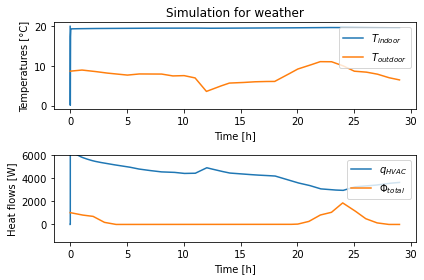

In [18]:
TCM_funcs.solver(TCAf, TCAc, TCAh, dt, u, u_c, t, Tisp, DeltaT, DeltaBlind, Kpc, Kph, rad_surf_tot)

# Discussion of Results

## Integration of Blinds
In order to understand the impact of the blinds, two simulations are done for the months of June and July. The first simulation (a) is without closing the blinds and the second one (b) is using the blinds.

a) 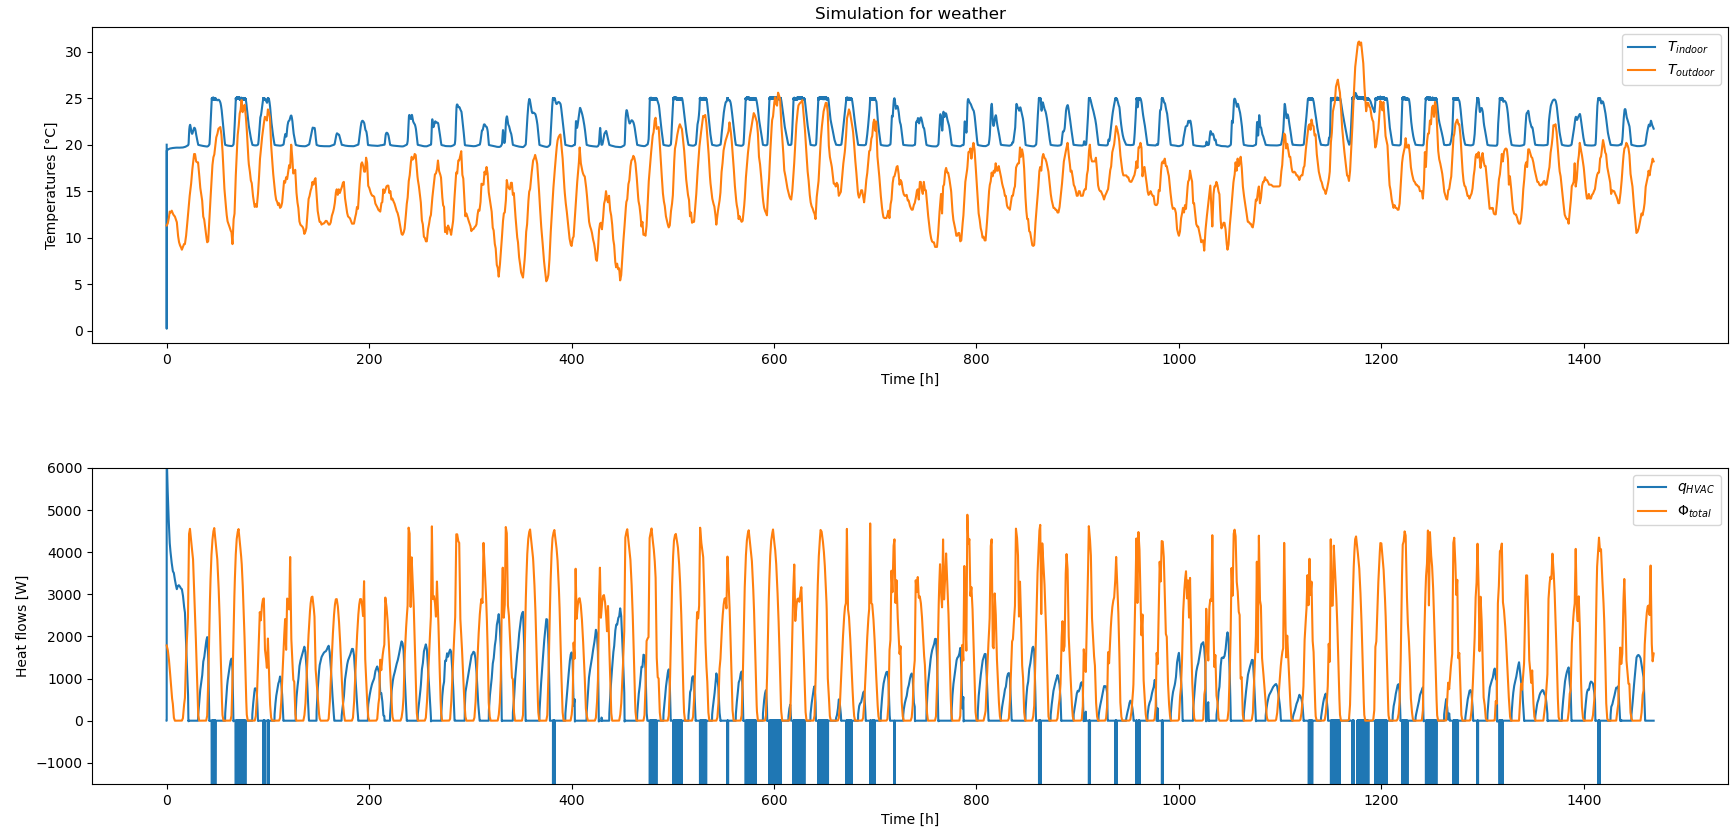
The results for the simulation without blinds show that a high amount of cooling is necessary during the summer. The $q_{HVAC}$ has a negative spike each time there is a spike in the radiation. This would show the necessity to cool down the building a lot despite the fact that it is set in a country with mild to cold weather.

b) 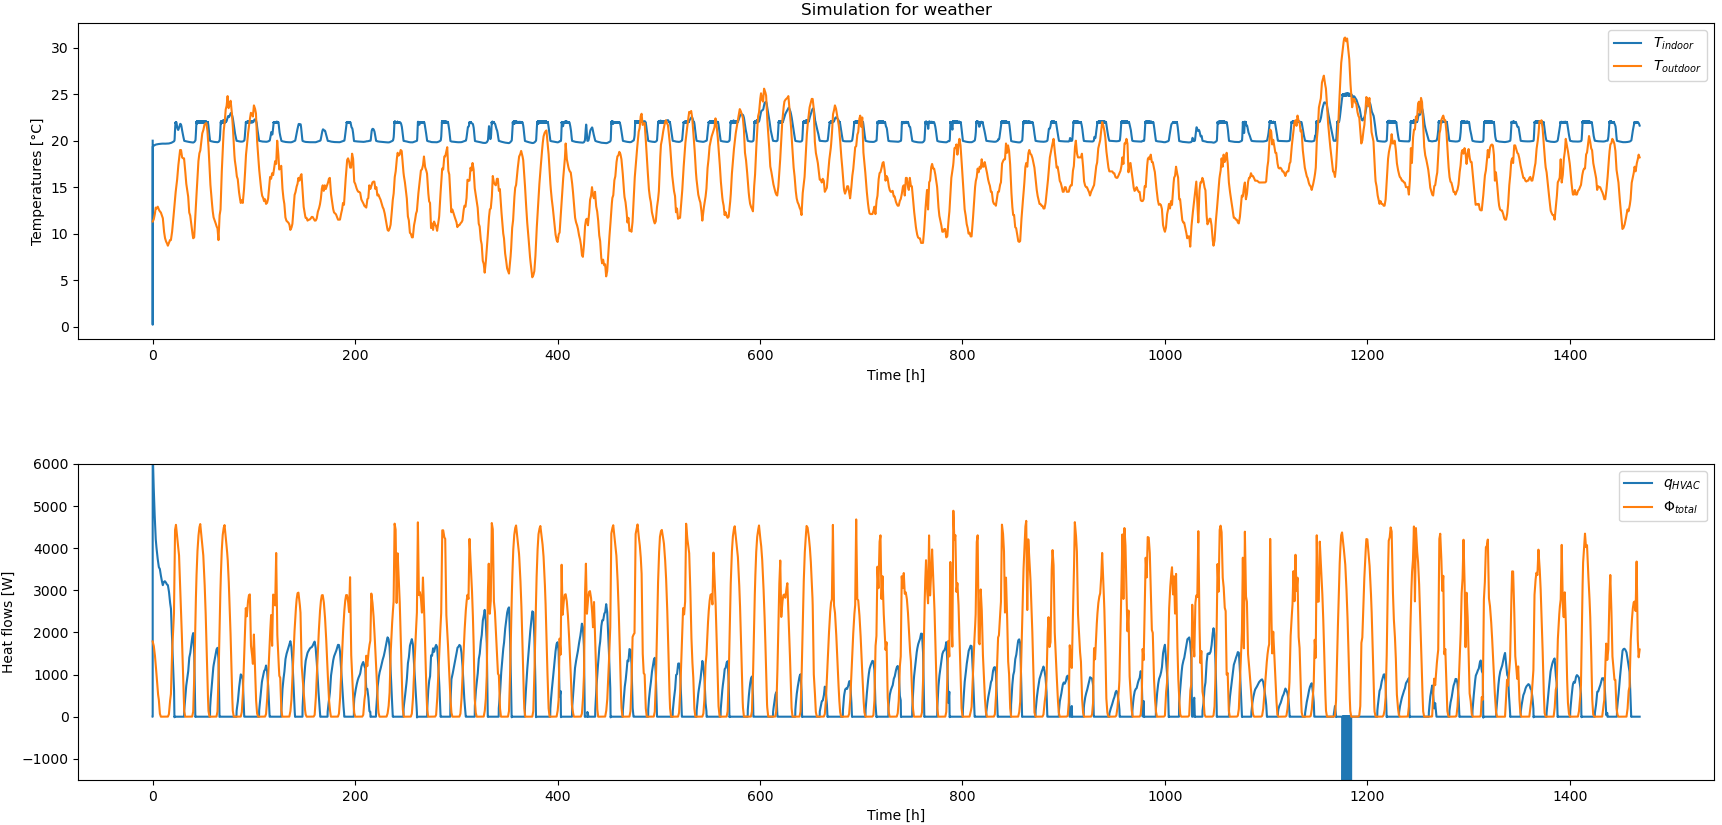

The simulation with the blinds shows that there is a much lower need for cooling. There are still spikes in the $q_{HVAC}$ but now they don't appear for every spike in radiation. The maximum value of the cooling is also lower than when the blinds are not used. The use of free cooling and closing the blinds have an important impact on the results of the simulations. The implementation of the blinds can be therefore be assumed as sucessful.

## Integration of different Controllers

In both cases above, the temperature is varying between 20 and 25°C. This shows that the controllers are working appropriately. The following image shows the results of a simulation during the months of January and February.
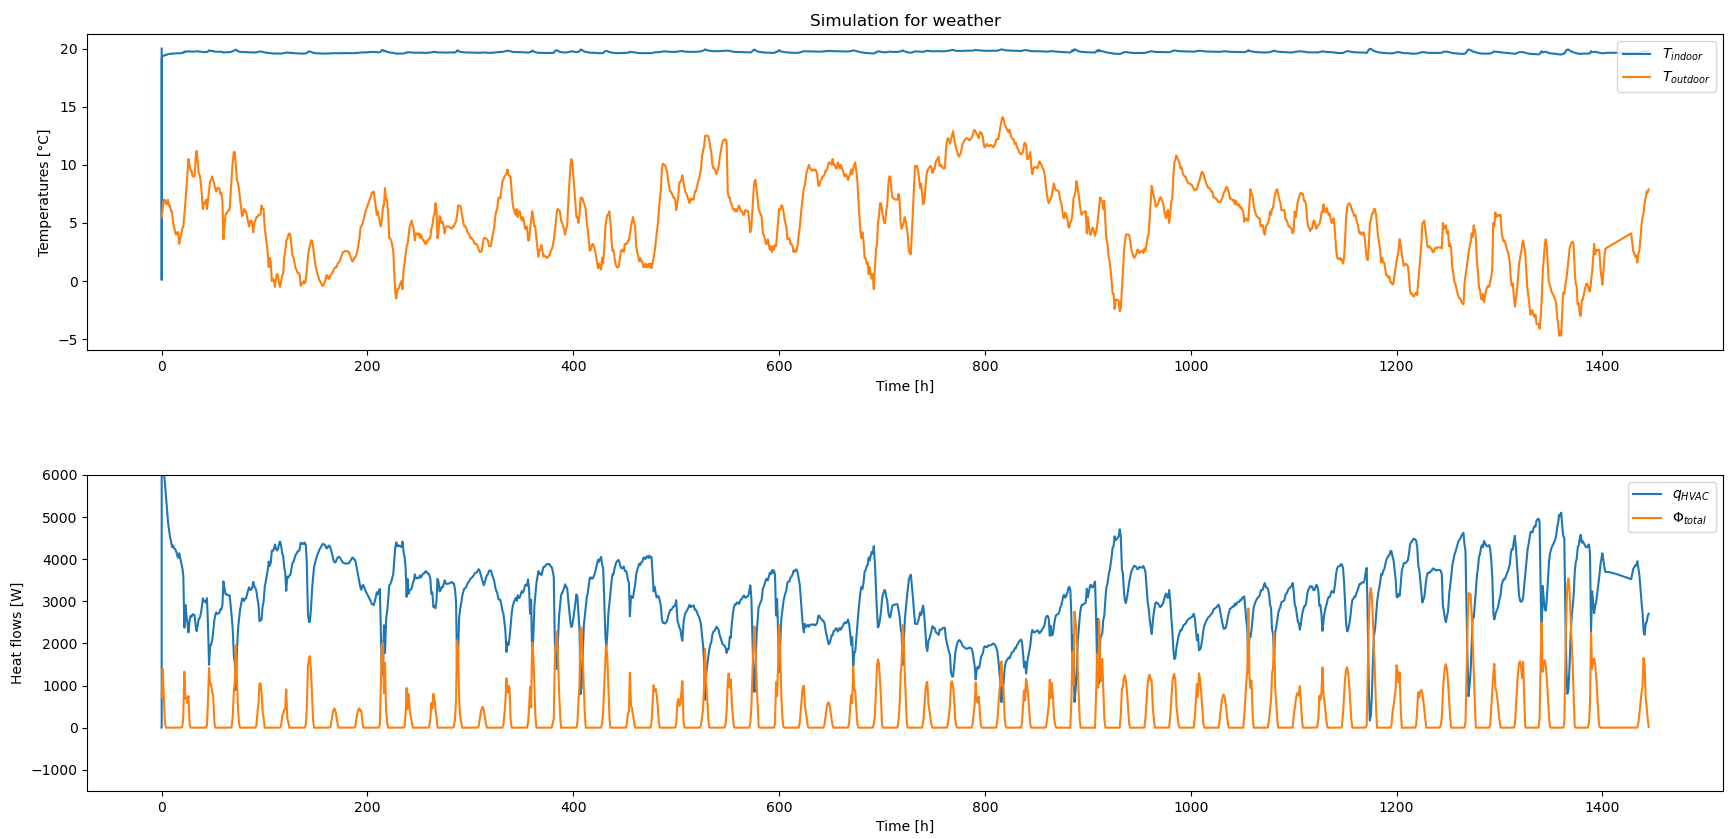
In this simulation, there is no need for cooling at all (as would be expected of a house in winter). The need for heating is also low. The temperature is very stable around the desired temperature. The controller is working correctly in the winter as well, with less fluctuation of the temperature.

## Simulation for a Year

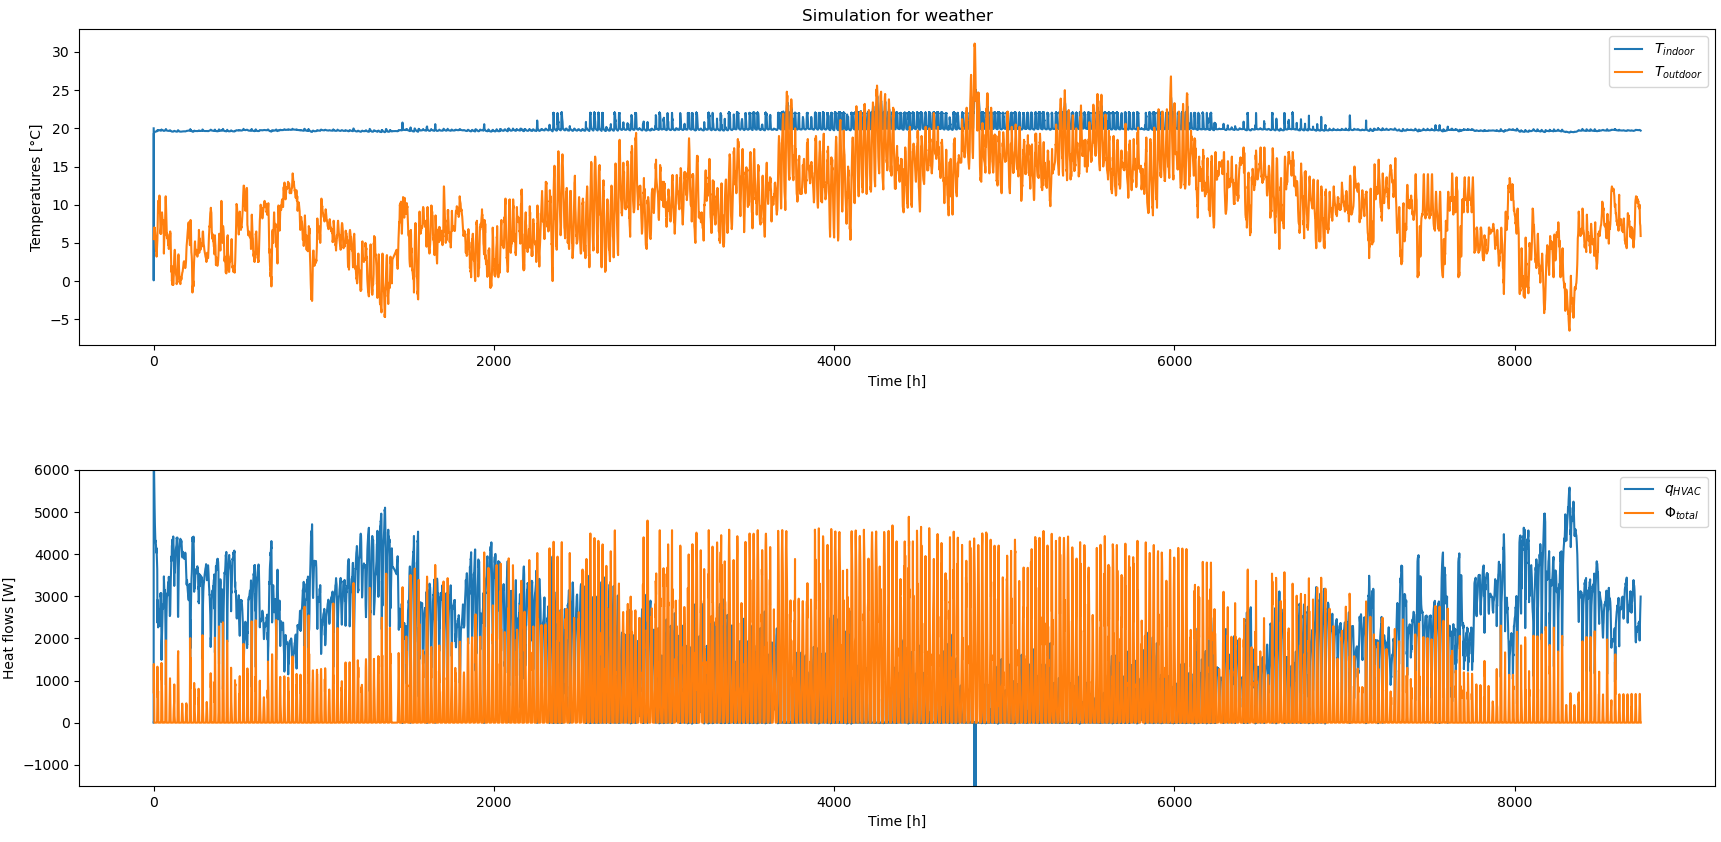
In a simulation for a whole year, the temperature shows fluctuation between 20 and 25°C. This is to be expected as in this interval only the free cooling is used. Whenever the temperature gets higher or lower than these bounds, the cooling or heating get activated and the temperature quickly goes back to the interval. The graph also shows that the cooling (negative $q_{HVAC}$) only gets activated during the summer. The rest of the year, only heating is required.

# Conclusions

Judging by the simulations done with different outdoor conditions, we can tell that the controlls of our code seem to be working. From the results we can tell that these results are realistic in terms of their trends. 
Before working with the building characteristics for this model, we used the same code for an even simpler building. This showed us that the idea of a very flexible code structure would work well as it would mean we would not have to reinput the element functions and assembly matrix each time we changed the size of the building. The only things that need to be changed are the building characteristics csv file and values in the input section of the main python file. However the code would benefit if it were cleaned and optimised, which we were not able to do with our current python skills and the limited time. 
As for the model itself, it is still an over simplification of the original building. For example we only have one window which faces west and this is not accurate for the exisiting building. To add more windows, one could easily add three more window elements to the building characteristics and adjust the surfaces of the solid walls, this would lead to a total of $10 + 3 = 13$ thermal circuits. This is a simple task and we will give a demonstration of it in our presentation.
Another questionable assumption is the temperature independence of the thermal conductances. For example the one for soil is given for a temperature of 300 K where we assume, that the soil below the building has a temperature of 283.15 K (10°C).
With more time, we could reduce the error in the results by de-simplifying our assumptions by adding other functions which could take into account the non-linearity of conduction, the view factor and 